<div style="direction:rtl;line-height:400%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="Iransans Medium" size=50>
				<p></p>
				<p></p>
به نام خدا

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score, classification_report
import joblib

import warnings
warnings.filterwarnings("ignore")

<div style="direction:rtl;line-height:300%;">
	<font face="B Titr" size=1 color=black>
در سلول زیر توابع عملیات پیش‌پردازش داده‌ها تعریف شده است
        
<div style="direction:rtl;line-height:300%;">
1- تابع اول: جهت شناسایی دادگان دورافتاده با استفاده از شاخص آماری دامنه میان چارکی
    
<div style="direction:rtl;line-height:300%;">    
2- تابع دوم: جهت شناسایی دادگان دورافتاده با استفاده از استانداردسازی دادگان
    
<div style="direction:rtl;line-height:300%;">    
3- تابع سوم: جهت مدیریت دادگان دورافتاده با استفاده از تبدیل آماری
    
<div style="direction:rtl;line-height:300%;">    
4- تابع چهارم: پیاده‌سازی جست‌وجوی شبکه‌ای بمنزله پیدا کردن اجزای بهینه مدل‌های پیش‌بینی (هایپرپارامتر)    

# Define functions 

In [3]:
def iqr_outliers(df):
    out=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    return out, len(out)

def Zscore_outlier(df):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    return out, len(out)
    
def percentile_capping(df, cols, from_low_end, from_high_end):
    for col in cols:
        lower_bound = df[col].quantile(from_low_end)
        upper_bound = df[col].quantile(1-from_high_end)
        df[col] = np.where(df[col]>upper_bound, upper_bound, np.where(df[col]<lower_bound, lower_bound, df[col]))
        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end))
#         return df_wins['total day minutes'].describe()
    
def GrdSrch_Tune(model, X, y, params):
    
    clf = GridSearchCV(model, params, scoring ='accuracy', cv = 5, n_jobs=-1)
    clf.fit(X, y)
    
    print("best score is :" , clf.best_score_)
    print("best estimator is :" , clf.best_estimator_)
    print("best Params is :" , clf.best_params_)
    
    return (clf.best_score_)

# Data understanding and EDA

In [9]:
df = pd.read_csv(r"C:\Heart data.csv")
df.head()

,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,c
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [10]:
df_test = pd.read_csv(r"C:\Users\amirr\Class Exercises\heart dataaa\Heart data_test.csv")
df_test.head()

,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal
0,43,0,2,122,263,0,0,173,0,0.0,1,0,7
1,59,1,1,140,283,1,1,162,1,1.0,1,0,3
2,58,0,3,120,340,1,0,172,0,0.0,1,1,3
3,69,0,1,150,226,0,0,114,1,2.6,3,0,3
4,42,0,4,150,247,0,1,171,0,1.5,1,1,3


In [ ]:
df = df.rename(columns = {'Age (age in year)':'Age',
                          'chest pain':'chest_pain',
                          'blood pressure':'blood_pressure',
                          'cholestoral ':'cholestoral',
                          'blood sugar':'blood_sugar',
                          'electrocardiographic ':'electrocardiographic',
                          'heart rate':'heart_rate',
                          'exercise induced':'exercise_induced',
                          'depression ':'depression'})


df_test = df_test.rename(columns = {'Age (age in year)':'Age',
                          'chest pain':'chest_pain',
                          'blood pressure':'blood_pressure',
                          'cholestoral ':'cholestoral',
                          'blood sugar':'blood_sugar',
                          'electrocardiographic ':'electrocardiographic',
                          'heart rate':'heart_rate',
                          'exercise induced':'exercise_induced',
                          'depression ':'depression'})
df.head()

<div style="direction:rtl;line-height:300%;">
	<font face="B Titr" size=2 color=black>
دو رویکرد صحیح پیاده‌سازی عملیات پیش‌پردازش دادگان با احتساب چالش عدم نشت داده:
 
<div style="direction:rtl;line-height:300%;">
    	<font face="B Titr" size=1 color=black>
1- بررسی دادگان دورافتاده و اشتباه کل دیتا، بررسی دادگان مفقوده کل داده، تقسیم دادگان به سبد آموزش و آزمایش و پیاده‌سازی نرمال سازی بروی دادگان آموزش و صحه‌گذاری آن با سبد آزمایش
    
    
    
<div style="direction:rtl;line-height:300%;">
2- تقسیم دادگان به سبد آموزش و آزمایش، بررسی دادگان دورافتاده و اشتباه سبد آموزش، بررسی دادگان مفقوده سبد آموزش، پیاده‌سازی نرمال‌سازی بروی دادگان آموزش و صحه‌گذاری آن با سبد آزمایش  
        
       
    
<div style="direction:rtl;line-height:300%;">
	<font face="B Titr" size=1 color=red>
نکته1: استراتژی اول رو ممکنه در برخی از کتب رفرنس بجهت سهولت فرآیند آموزشی کتاب مشاهده کنید. یک دیتای پاک بدون دغدغه‌ای بعنوان معیار قرار می‌گیرد و سپس تقسیم‌بندی آموزش/آزمایش و ...

        
   
<div style="direction:rtl;line-height:300%;">
	<font face="B Titr" size=1 color=red>
نکته2: استراتژی دوم به جهت خلق مدل پایدار در تحلیل‌های پیشرفته با انجام روش‌هایی مثل: قرارگیری از قصد داده پرت/نویز در سبد آزمایش (ولیدیشن) توصیه می‌گردد. (بجهت به چالش کشیدن بیشتر مدل) 
                
    
<div style="direction:rtl;line-height:300%;">
    	<font face="B Titr" size=1 color=black>
در ادامه با استفاده از استراتژی دوم، کلیه عملیات‌ها بر روی دادگان آموزش پیاده‌سازی شده و چارچوب دست آمده از دادگان آموزش، توسط دادگان آزمایش (ولیدیشن) مورد ارزیابی قرارمی‌گیرد.     

In [12]:
df_train, df_val = train_test_split(df, random_state =0 , test_size = 0.2)
print(df_train.shape)
print(df_val.shape)

(477, 14)
(120, 14)


In [13]:
print("Train:")
print(df_train.shape)
print(" ")

print("Val:")
print(df_val.shape)
print(" ")
print("Test:")
print(df_test.shape)

Train:
(477, 14)
 
Val:
(120, 14)
 
Test:
(18, 13)


In [14]:
print("Train:")
print(df_train.columns)
print("\n\n")
print("Val:")

print(df_val.columns)
print("\n \n")
print("Test:")
print(df_test.columns)

Train:
Index(['Age', 'sex', 'chest_pain', 'blood_pressure', 'cholestoral',
       'blood_sugar', 'electrocardiographic', 'heart_rate', 'exercise_induced',
       'depression', 'slope', 'ca', 'thal', 'c'],
      dtype='object')



Val:
Index(['Age', 'sex', 'chest_pain', 'blood_pressure', 'cholestoral',
       'blood_sugar', 'electrocardiographic', 'heart_rate', 'exercise_induced',
       'depression', 'slope', 'ca', 'thal', 'c'],
      dtype='object')

 

Test:
Index(['Age', 'sex', 'chest_pain', 'blood_pressure', 'cholestoral',
       'blood_sugar', 'electrocardiographic', 'heart_rate', 'exercise_induced',
       'depression', 'slope', 'ca', 'thal'],
      dtype='object')


In [15]:
print("Train:")
print(df_train.info())
print("\n \n")
print("Val:")

print(df_val.info())
print("\n \n")
print("Test:")
print(df_test.info())

Train:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 239 to 559
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   477 non-null    int64  
 1   sex                   477 non-null    int64  
 2   chest_pain            477 non-null    int64  
 3   blood_pressure        476 non-null    float64
 4   cholestoral           457 non-null    float64
 5   blood_sugar           471 non-null    float64
 6   electrocardiographic  476 non-null    float64
 7   heart_rate            476 non-null    float64
 8   exercise_induced      476 non-null    float64
 9   depression            477 non-null    float64
 10  slope                 328 non-null    float64
 11  ca                    240 non-null    float64
 12  thal                  263 non-null    float64
 13  c                     477 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.9 KB
None

 

Val:
<cla

In [16]:
print("Train:")
print(df_train.isnull().sum())
print("\n*********************\n")
print("Val:")
print(df_val.isnull().sum())
print("\n*********************\n")
print("Test:")
print(df_test.isnull().sum())

Train:
Age                       0
sex                       0
chest_pain                0
blood_pressure            1
cholestoral              20
blood_sugar               6
electrocardiographic      1
heart_rate                1
exercise_induced          1
depression                0
slope                   149
ca                      237
thal                    214
c                         0
dtype: int64

*********************

Val:
Age                      0
sex                      0
chest_pain               0
blood_pressure           0
cholestoral              3
blood_sugar              2
electrocardiographic     0
heart_rate               0
exercise_induced         0
depression               0
slope                   41
ca                      57
thal                    54
c                        0
dtype: int64

*********************

Test:
Age                     0
sex                     0
chest_pain              0
blood_pressure          0
cholestoral             0
blood_su

In [17]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,477.0,51.255765,9.232614,29.0,44.0,52.0,58.0,77.0
sex,477.0,0.698113,0.459558,0.0,0.0,1.0,1.0,1.0
chest_pain,477.0,3.071279,0.967515,1.0,2.0,3.0,4.0,4.0
blood_pressure,476.0,132.296218,17.609282,92.0,120.0,130.0,140.0,200.0
cholestoral,457.0,249.083151,55.600960,85.0,212.0,244.0,280.0,529.0
blood_sugar,471.0,0.104034,0.305629,0.0,0.0,0.0,0.0,1.0
electrocardiographic,476.0,0.623950,0.875018,0.0,0.0,0.0,2.0,2.0
heart_rate,476.0,144.256303,23.885725,71.0,127.0,147.0,162.0,202.0
exercise_induced,476.0,0.315126,0.465055,0.0,0.0,0.0,1.0,1.0
depression,477.0,0.806080,1.044144,0.0,0.0,0.2,1.5,6.2


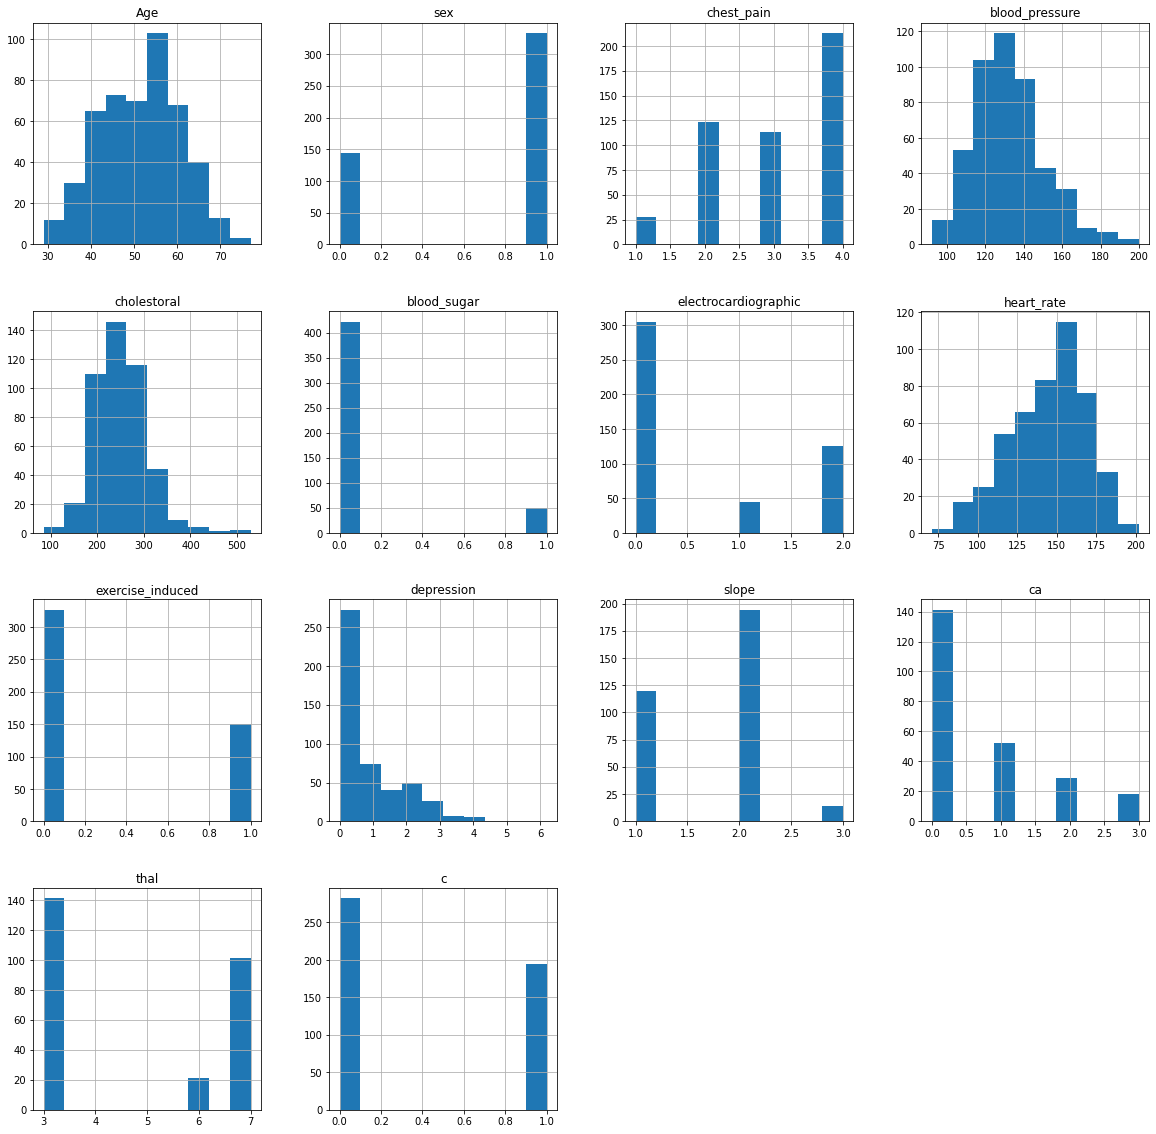

In [18]:
p = df_train.hist(figsize = (20,20))

0    282
1    195
Name: c, dtype: int64

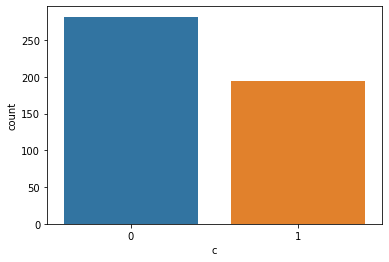

In [19]:
sns.countplot(x = 'c', data = df_train)
df_train.loc[:, 'c'].value_counts()

# Preprocessing

## Handle Outlier

In [20]:
col_names = df_train.columns

# ---------------------------
col_names_val = df_val.columns

# ---------------------------
col_names_test = df_test.columns

<div style="direction:rtl;line-height:300%;">
	<font face="B Titr" size=1 color=black>
در ادامه برای هر سه سبد دادگان عملیلت پیش‌پردازش داده‌ها پیاده‌سازی شده است. البته توجه شود سبد آزمایش نهایی داده مفقوده ندارد

In [15]:
print("Train: ")
outlier = []

for c in col_names:
    _, len_outlier_train = iqr_outliers(df_train[c])
    _, len_outlier_z_score_train = Zscore_outlier(df_train[c])
    
    if len_outlier_train !=0:
        outlier.append(c)
    print("IQR ->", c,": " , len_outlier_train)
    print("Z-score ->",c,": " , len_outlier_z_score_train)
    print("*****************")

Train: 
IQR -> Age :  0
Z-score -> Age :  0
*****************
IQR -> sex :  0
Z-score -> sex :  0
*****************
IQR -> chest_pain :  0
Z-score -> chest_pain :  0
*****************
IQR -> blood_pressure :  13
Z-score -> blood_pressure :  3
*****************
IQR -> cholestoral :  13
Z-score -> cholestoral :  4
*****************
IQR -> blood_sugar :  49
Z-score -> blood_sugar :  0
*****************
IQR -> electrocardiographic :  0
Z-score -> electrocardiographic :  0
*****************
IQR -> heart_rate :  1
Z-score -> heart_rate :  1
*****************
IQR -> exercise_induced :  0
Z-score -> exercise_induced :  0
*****************
IQR -> depression :  8
Z-score -> depression :  7
*****************
IQR -> slope :  0
Z-score -> slope :  0
*****************
IQR -> ca :  18
Z-score -> ca :  0
*****************
IQR -> thal :  0
Z-score -> thal :  0
*****************
IQR -> c :  0
Z-score -> c :  0
*****************


In [16]:
print("Val:")
outlier_val = []

for c in col_names_val:
    _, len_outlier_val = iqr_outliers(df_val[c])
    _, len_outlier_z_score_val = Zscore_outlier(df_val[c])
    if len_outlier_val !=0:
        outlier_val.append(c)
    print("IQR ->", c,": " , len_outlier_val)
    print("Z-score ->",c,": " , len_outlier_z_score_val)
    print("*****************")

Val:
IQR -> Age :  0
Z-score -> Age :  0
*****************
IQR -> sex :  0
Z-score -> sex :  0
*****************
IQR -> chest_pain :  0
Z-score -> chest_pain :  0
*****************
IQR -> blood_pressure :  4
Z-score -> blood_pressure :  1
*****************
IQR -> cholestoral :  6
Z-score -> cholestoral :  3
*****************
IQR -> blood_sugar :  16
Z-score -> blood_sugar :  0
*****************
IQR -> electrocardiographic :  0
Z-score -> electrocardiographic :  0
*****************
IQR -> heart_rate :  0
Z-score -> heart_rate :  0
*****************
IQR -> exercise_induced :  0
Z-score -> exercise_induced :  0
*****************
IQR -> depression :  4
Z-score -> depression :  2
*****************
IQR -> slope :  0
Z-score -> slope :  0
*****************
IQR -> ca :  3
Z-score -> ca :  1
*****************
IQR -> thal :  0
Z-score -> thal :  0
*****************
IQR -> c :  0
Z-score -> c :  0
*****************


In [17]:
print("Test:")
outlier_test = []    

for c in col_names_test:
    _ , len_outlier_test = iqr_outliers(df_test[c])
    _ , len_outlier_z_score_test = Zscore_outlier(df_test[c])
    if len_outlier_test !=0:
        outlier_test.append(c)
    print("IQR ->", c,": " , len_outlier_test)
    print("Z-score ->", c,": " , len_outlier_z_score_test)
    print("*****************")

Test:
IQR -> Age :  0
Z-score -> Age :  0
*****************
IQR -> sex :  0
Z-score -> sex :  0
*****************
IQR -> chest_pain :  0
Z-score -> chest_pain :  0
*****************
IQR -> blood_pressure :  0
Z-score -> blood_pressure :  0
*****************
IQR -> cholestoral :  0
Z-score -> cholestoral :  0
*****************
IQR -> blood_sugar :  0
Z-score -> blood_sugar :  0
*****************
IQR -> electrocardiographic :  0
Z-score -> electrocardiographic :  0
*****************
IQR -> heart_rate :  2
Z-score -> heart_rate :  0
*****************
IQR -> exercise_induced :  0
Z-score -> exercise_induced :  0
*****************
IQR -> depression :  0
Z-score -> depression :  0
*****************
IQR -> slope :  0
Z-score -> slope :  0
*****************
IQR -> ca :  1
Z-score -> ca :  0
*****************
IQR -> thal :  0
Z-score -> thal :  0
*****************


In [18]:
goal_features = []
for c in df.columns:
    print(c)
    print(len(df[c].unique())) 
    if len(df[c].unique()) > 6:
        goal_features.append(c)
    print("*************")

print("----------------------")
print(goal_features)

Age
47
*************
sex
2
*************
chest_pain
4
*************
blood_pressure
55
*************
cholestoral
202
*************
blood_sugar
3
*************
electrocardiographic
4
*************
heart_rate
104
*************
exercise_induced
3
*************
depression
41
*************
slope
4
*************
ca
6
*************
thal
4
*************
c
2
*************
----------------------
['Age', 'blood_pressure', 'cholestoral', 'heart_rate', 'depression']


In [21]:
outlier_new_win = ['blood_pressure', 'cholestoral', 'heart_rate', 'depression']

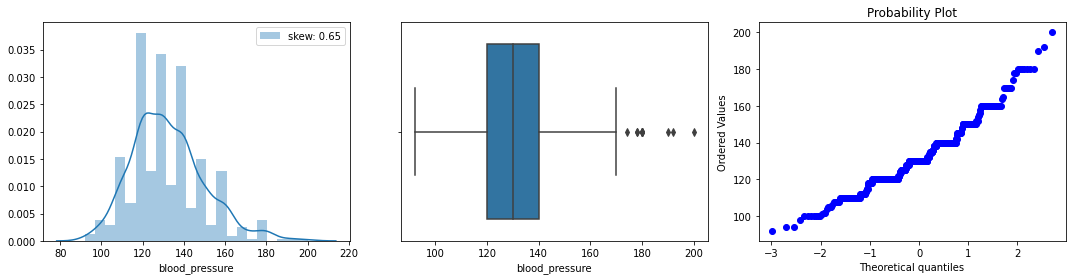

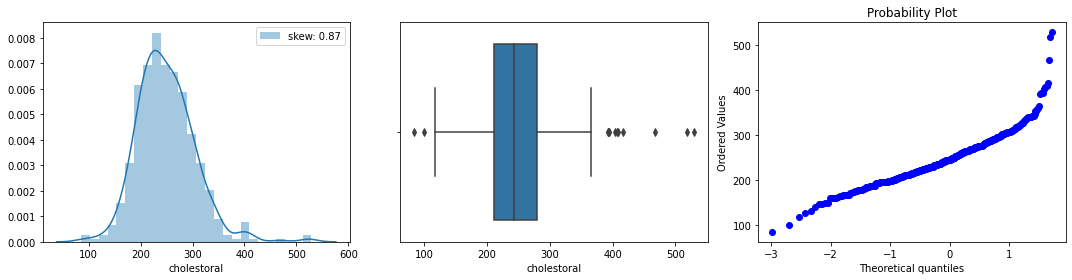

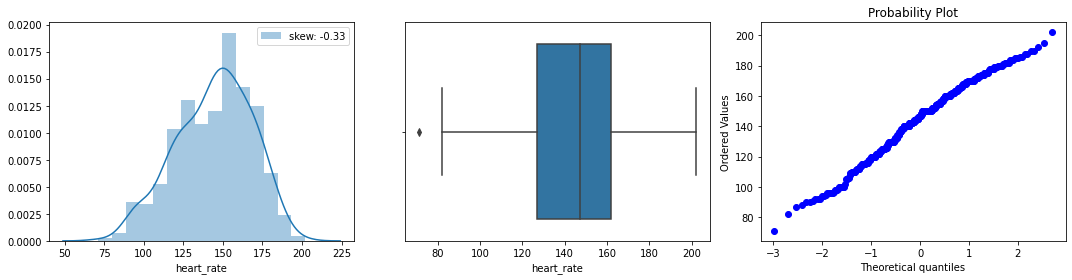

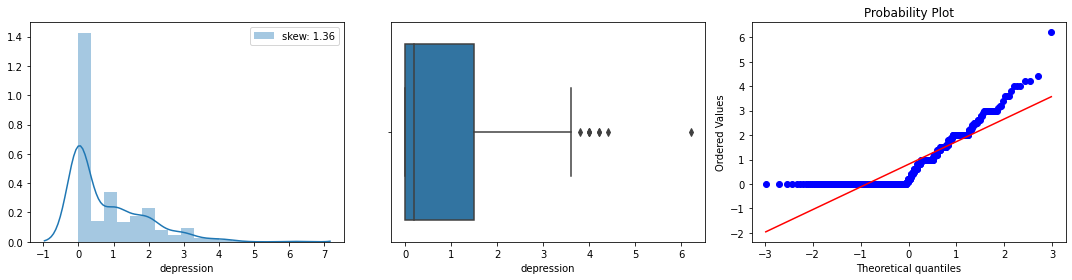

In [22]:
# ------------------- Train -----------------------
for col in outlier_new_win:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))
    plt.legend()
    
    plt.subplot(132)
    sns.boxplot(df_train[col])
    
    plt.subplot(133)
    stats.probplot(df_train[col], plot=plt)
    plt.tight_layout()
    plt.show()

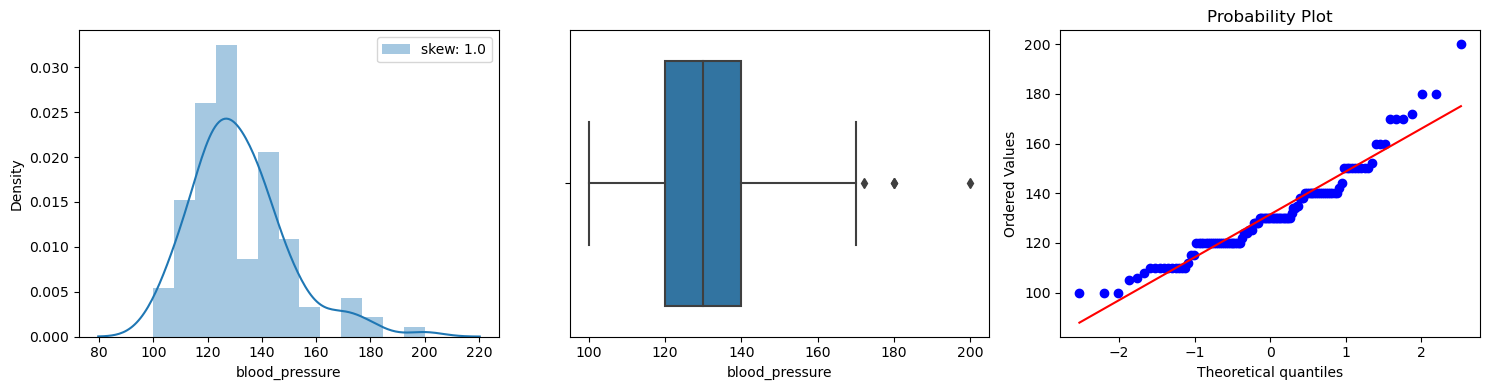

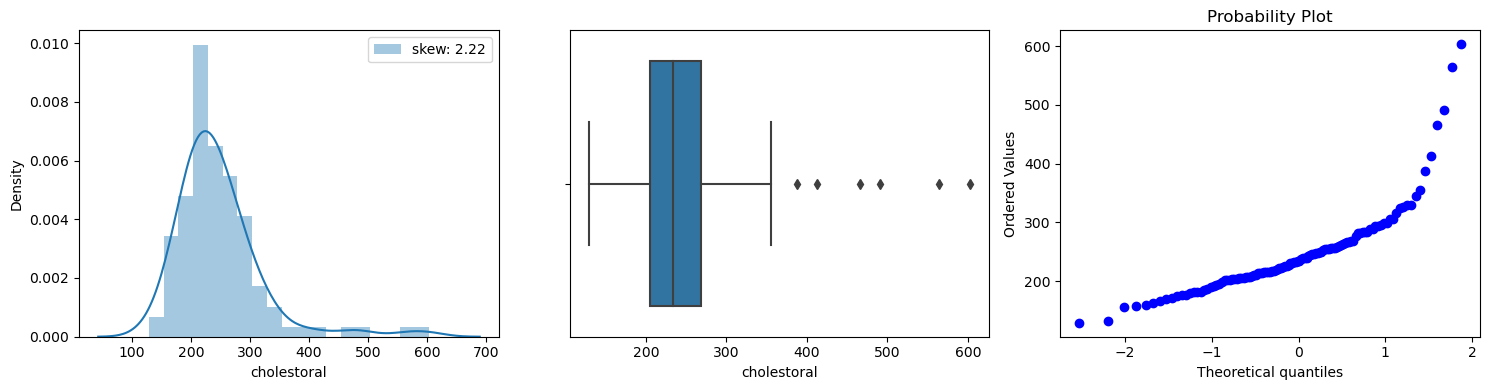

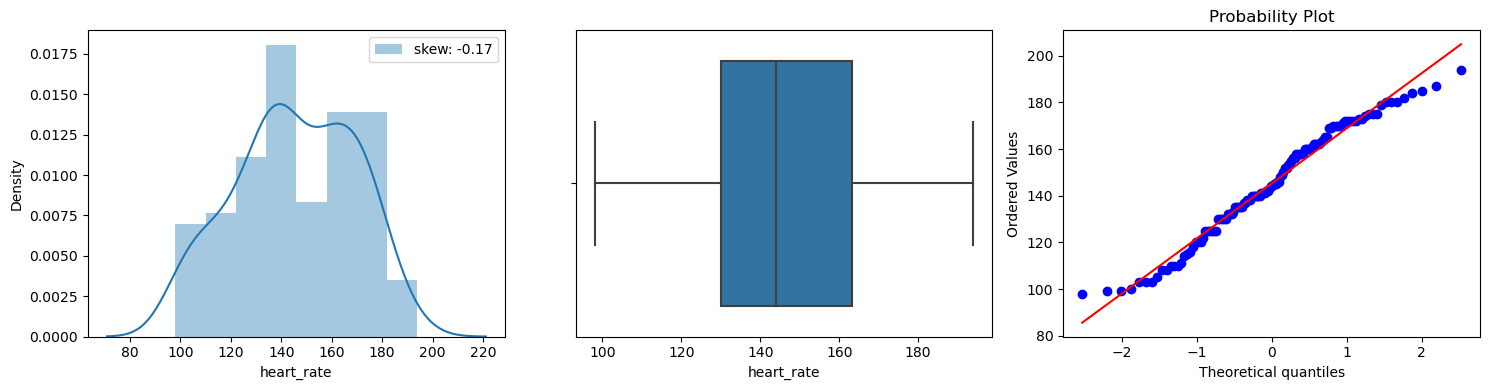

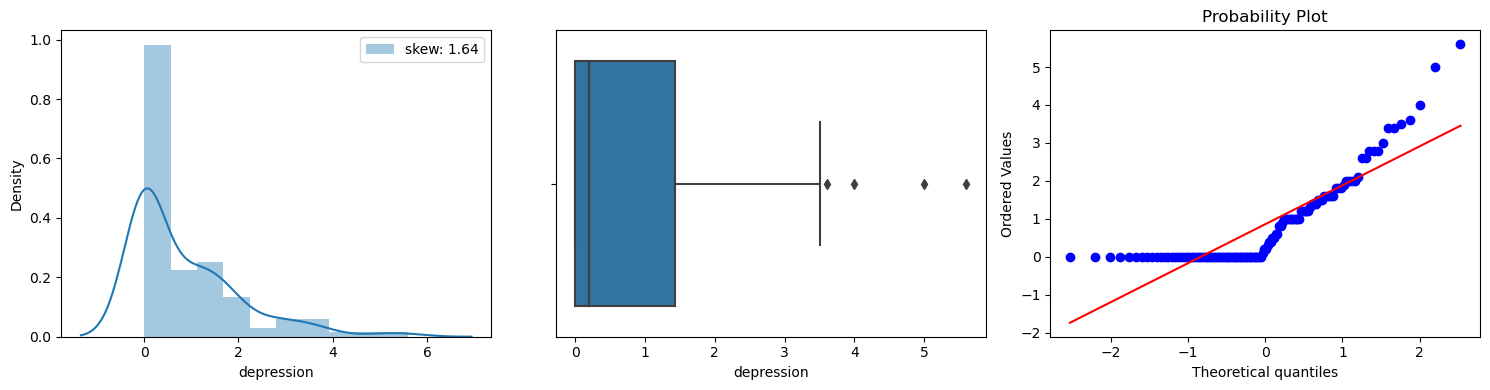

In [21]:
# ------------------- Val -----------------------
for col in outlier_new_win:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df_val[col], label="skew: " + str(np.round(df_val[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df_val[col])
    plt.subplot(133)
    stats.probplot(df_val[col], plot=plt)
    plt.tight_layout()
    plt.show()

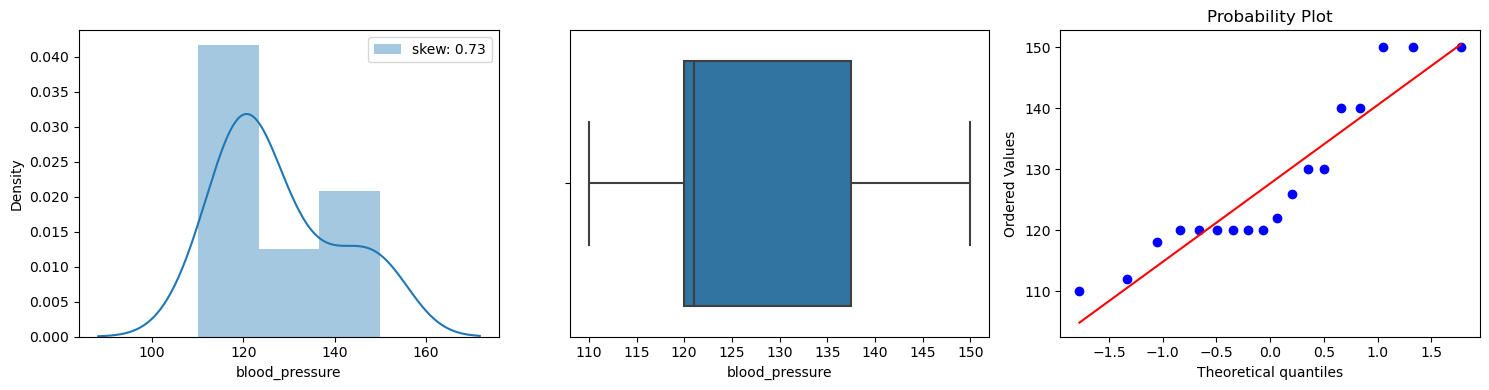

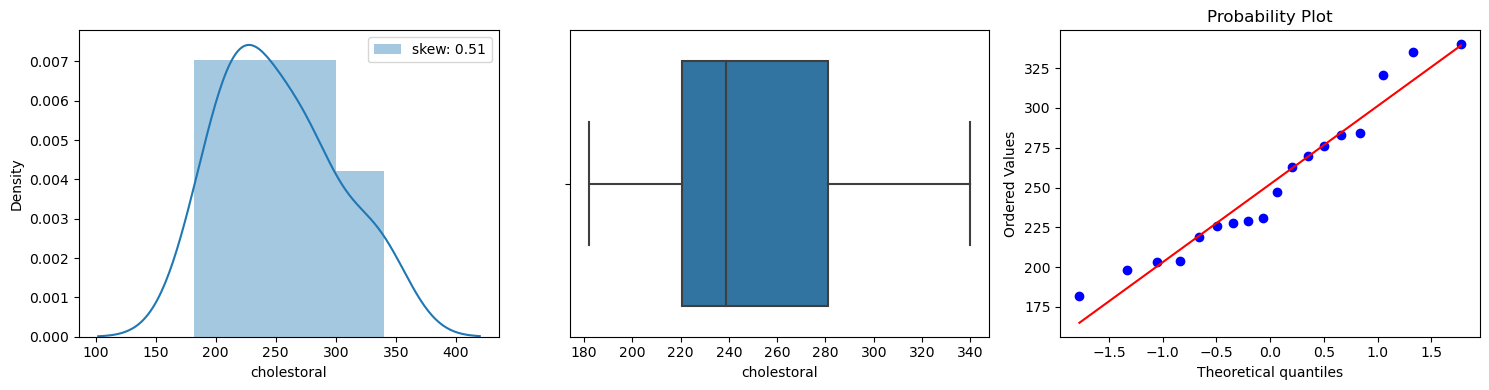

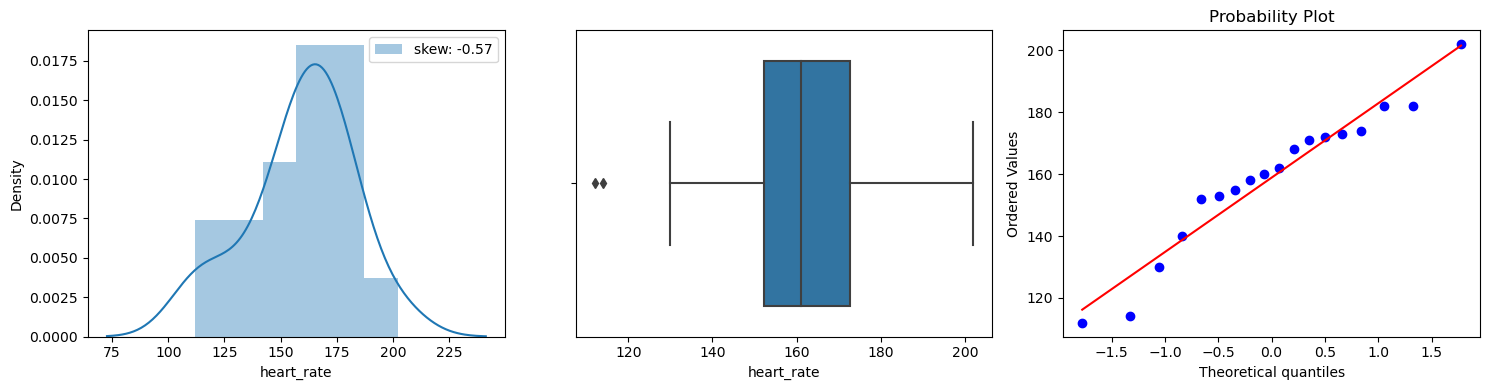

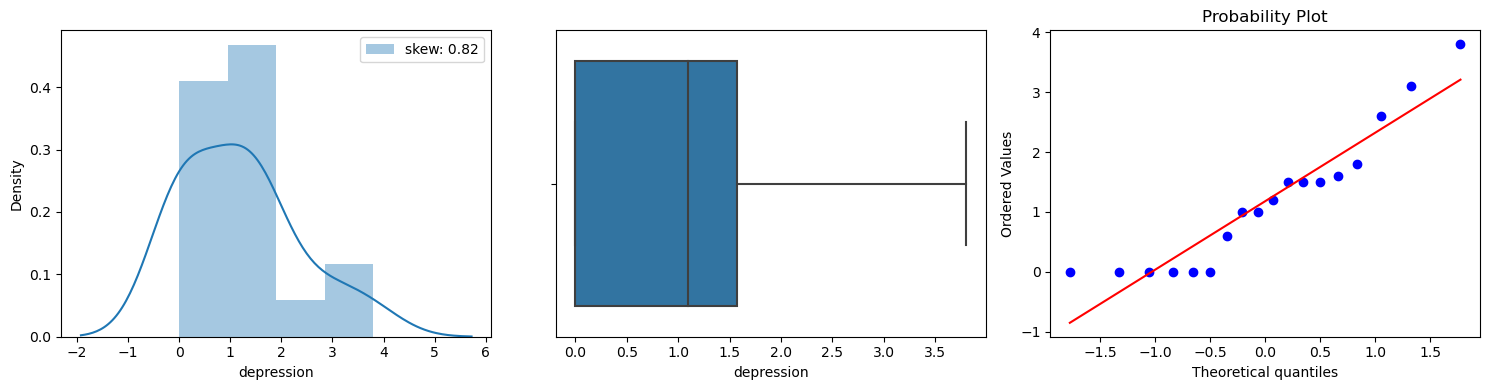

In [22]:
# ------------------- Test -----------------------
for col in outlier_new_win:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df_test[col], label="skew: " + str(np.round(df_test[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df_test[col])
    plt.subplot(133)
    stats.probplot(df_test[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [23]:
df_train_0_01 = df_train.copy()
df_train_0_05 = df_train.copy()

# -----------------------------
df_val_0_01 = df_val.copy()
df_val_0_05 = df_val.copy()

# -----------------------------
df_test_0_01 = df_test.copy()
df_test_0_05 = df_test.copy()

## `limit =0.01` 

In [24]:
percentile_capping(df_train_0_01, outlier_new_win, 0.01, 0.01)
percentile_capping(df_val_0_01, outlier_new_win, 0.01, 0.01)
percentile_capping(df_test_0_01, outlier_new_win, 0.01, 0.01)

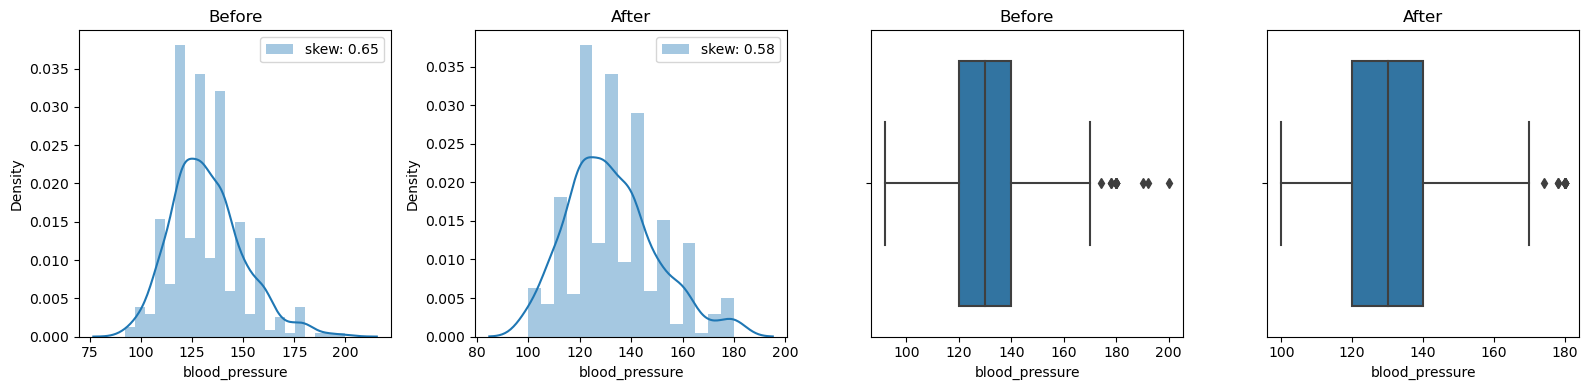

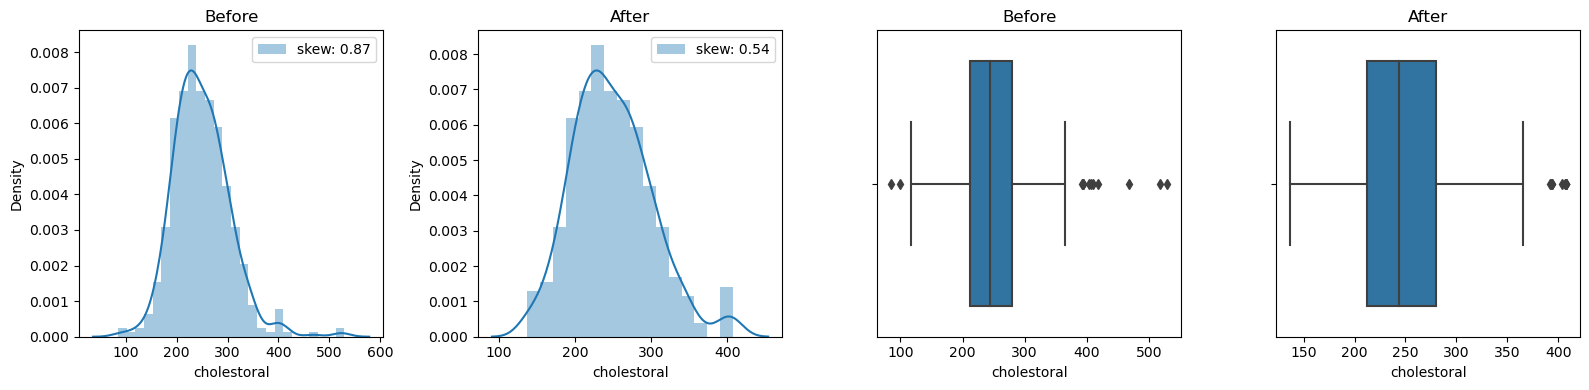

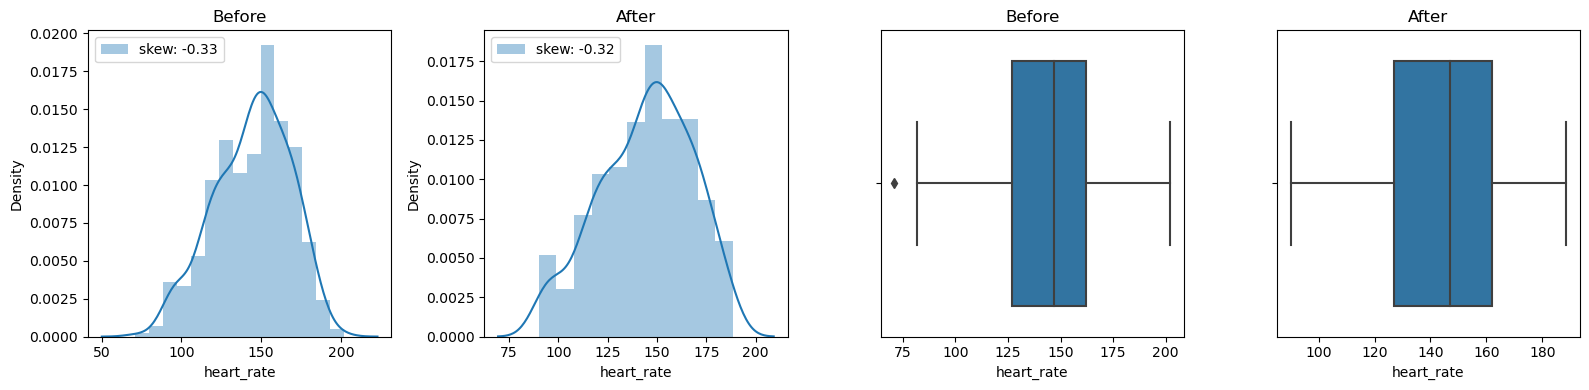

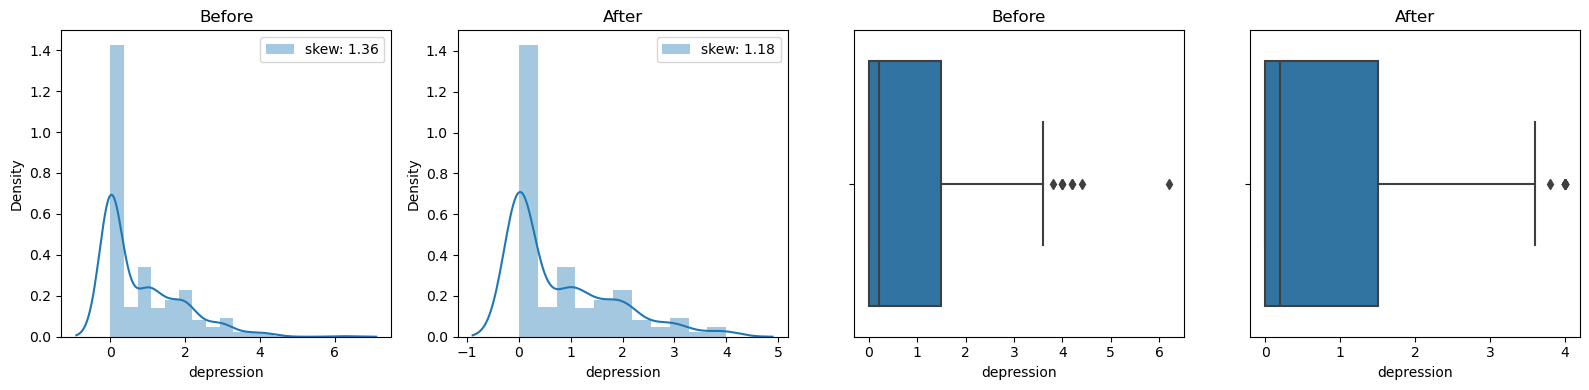

In [25]:
# ------------------- Train -----------------------
for col in outlier_new_win:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_train_0_01[col], label="skew: " + str(np.round(df_train_0_01[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_train[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_train_0_01[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

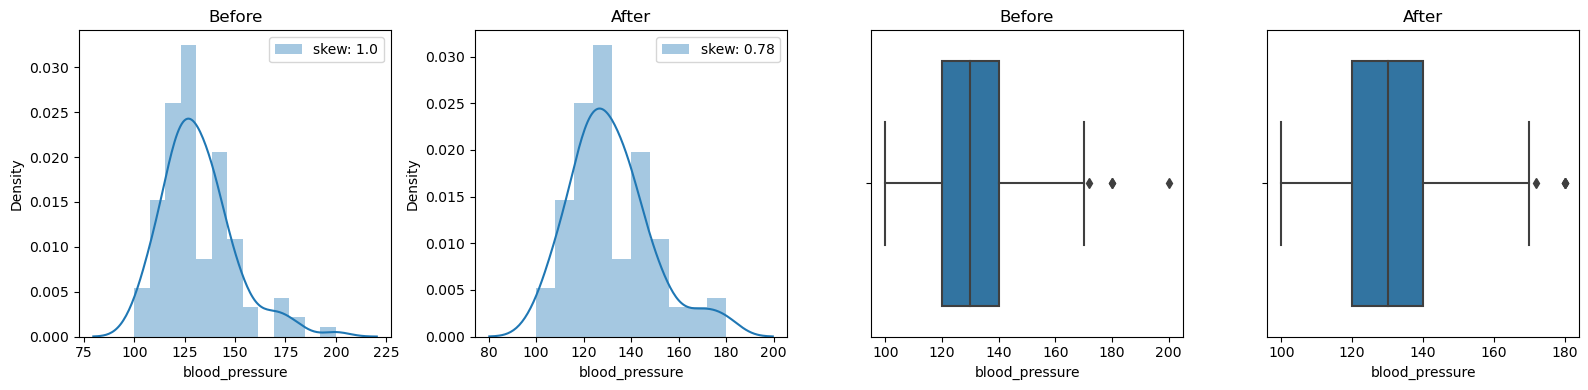

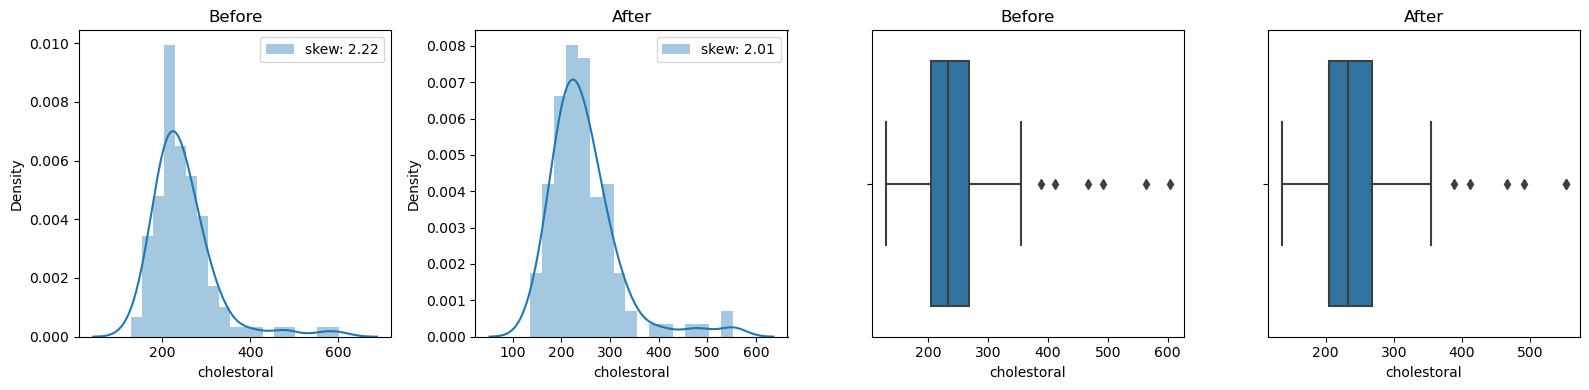

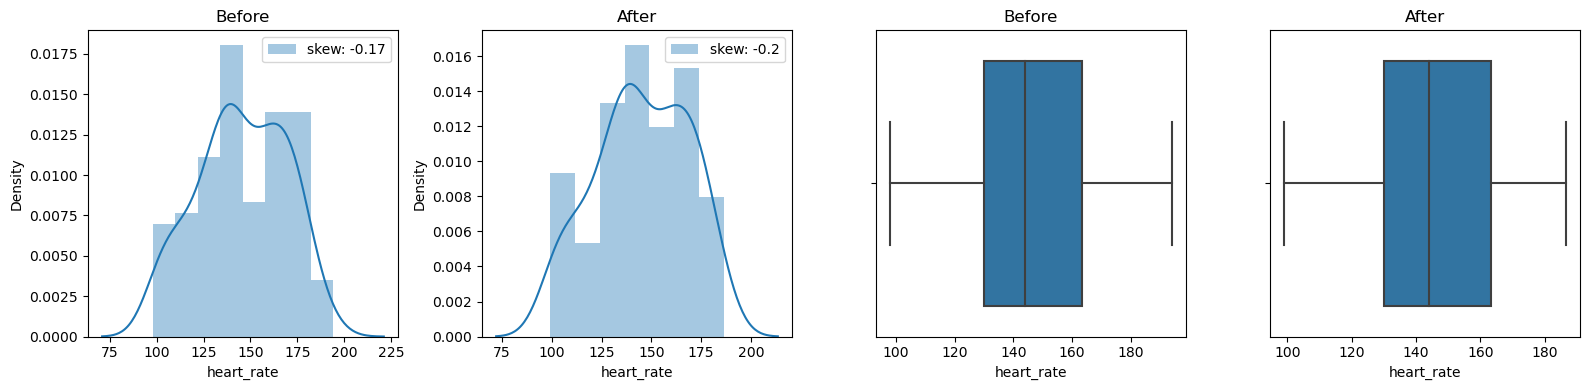

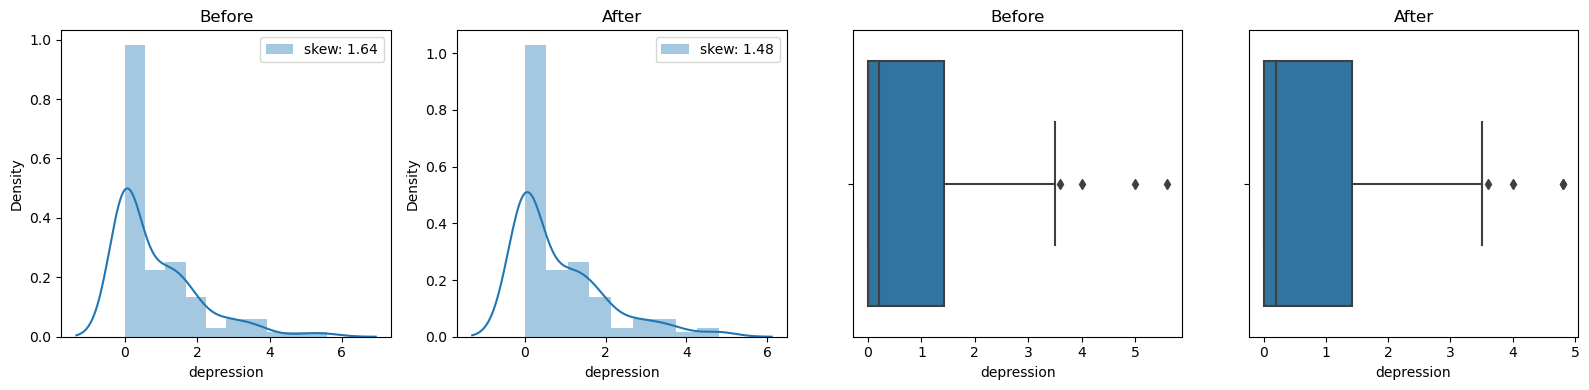

In [26]:
# ------------------- Val -----------------------
for col in outlier_new_win:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df_val[col], label="skew: " + str(np.round(df_val[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_val_0_01[col], label="skew: " + str(np.round(df_val_0_01[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_val[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_val_0_01[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

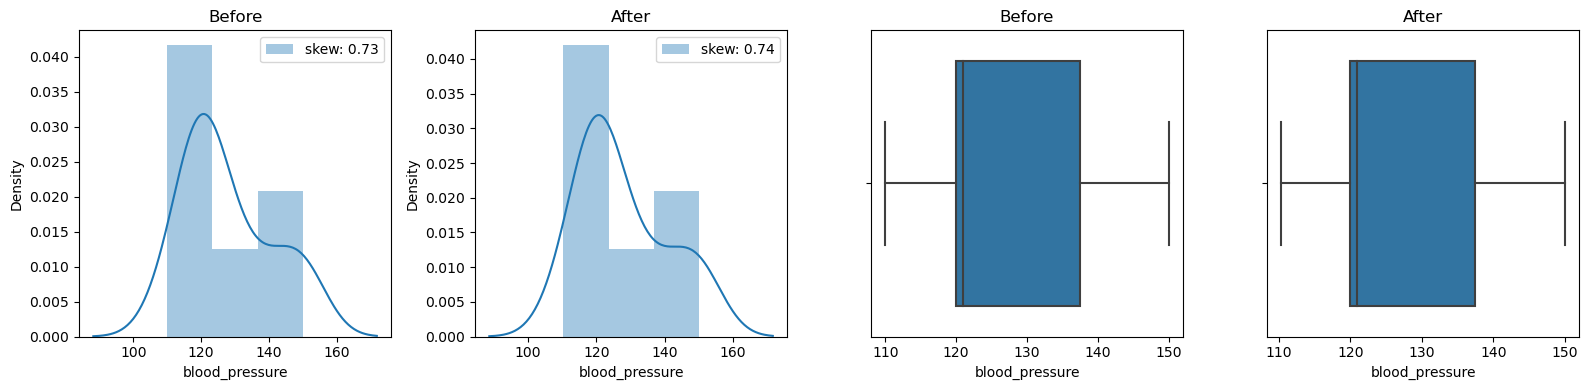

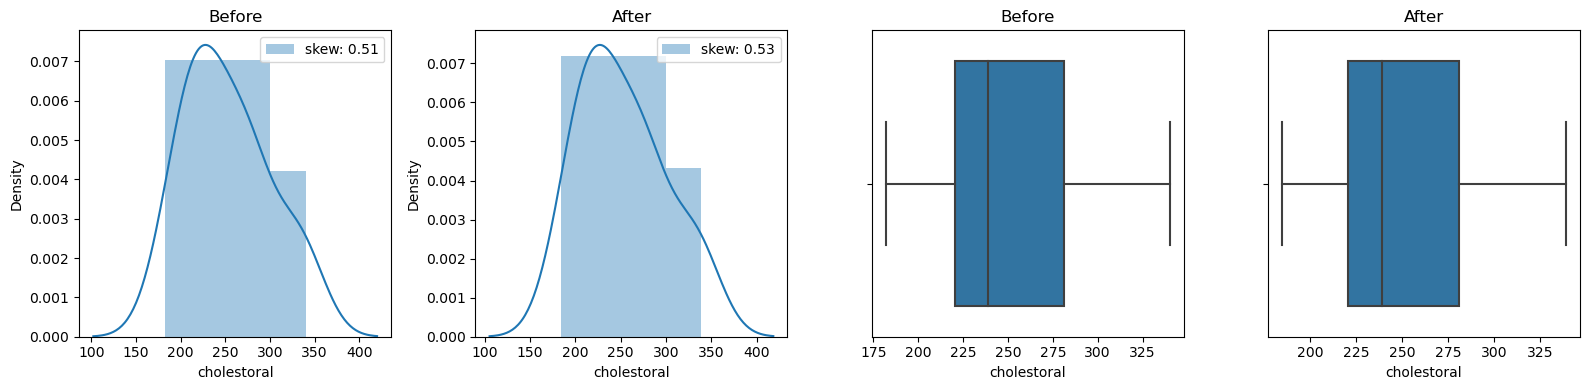

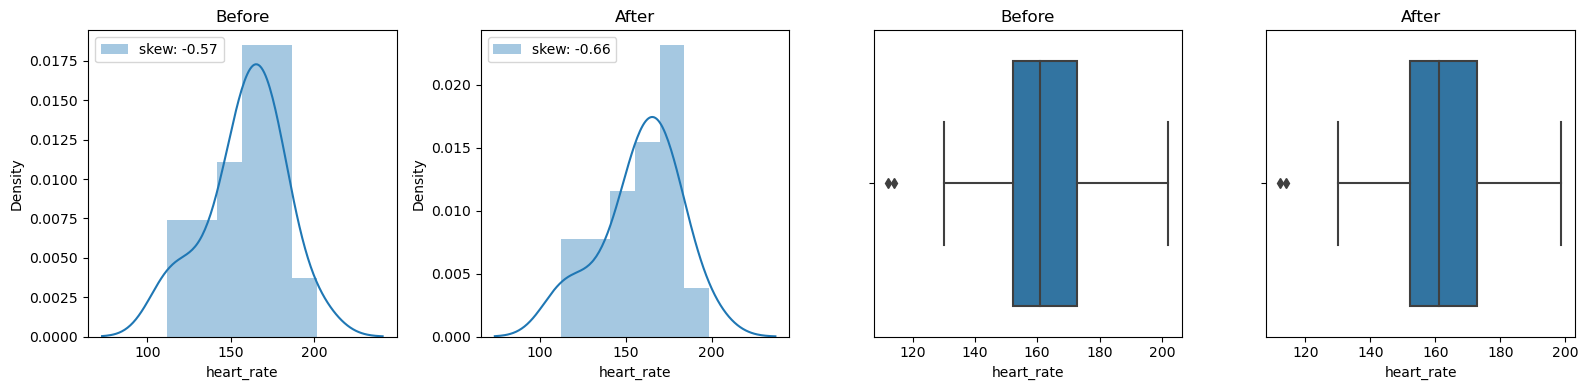

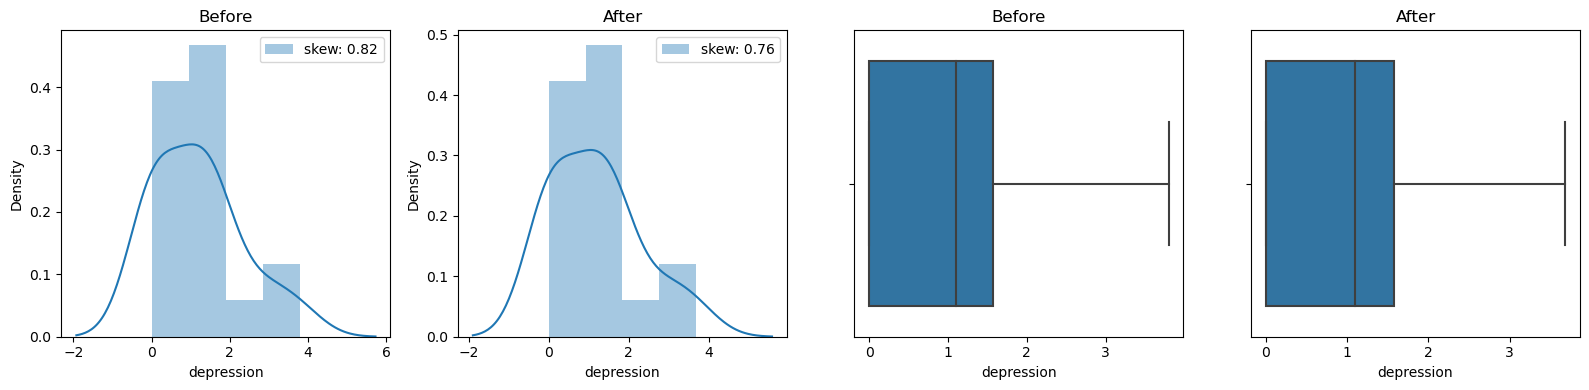

In [27]:
# ------------------- Test -----------------------
for col in outlier_new_win:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df_test[col], label="skew: " + str(np.round(df_test[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_test_0_01[col], label="skew: " + str(np.round(df_test_0_01[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_test[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_test_0_01[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [28]:
df_train[outlier_new_win].describe().T

,count,mean,std,min,25%,50%,75%,max
blood_pressure,476.0,132.296218,17.609282,92.0,120.0,130.0,140.0,200.0
cholestoral,457.0,249.083151,55.600960,85.0,212.0,244.0,280.0,529.0
heart_rate,476.0,144.256303,23.885725,71.0,127.0,147.0,162.0,202.0
depression,477.0,0.806080,1.044144,0.0,0.0,0.2,1.5,6.2


In [29]:
df_train_0_01[outlier_new_win].describe().T

,count,mean,std,min,25%,50%,75%,max
blood_pressure,476.0,132.254202,17.233886,100.0,120.0,130.0,140.0,180.00
cholestoral,457.0,248.694530,52.376262,136.6,212.0,244.0,280.0,407.88
heart_rate,476.0,144.267857,23.597685,90.0,127.0,147.0,162.0,188.50
depression,477.0,0.799790,1.019443,0.0,0.0,0.2,1.5,4.00


## `limit =0.05` - Do not run

<div style="direction:rtl;line-height:300%;">
	<font face="B Titr" size=1 color=black>
این سناریو رو در ژوپیتر ران نکنید صرفا جهت نمایش مدیریت دیگر داده‌های دورافتاده نمایش داده شده است. شما قادر خواهید بود هرسناریویی رو جهت مدیریت دادگان در قالب توابع تعریف کنید البته به جنس مولفه های کسب‌وکار نیز توجه کنید که متناسب با نوع دادگان سناریو سازی شود. با استفاده از دستور dtype اینکار امکان پذیر خواهد بود. (در کلاس گفتیم)

In [30]:
percentile_capping(df_train_0_05, outlier_new_win, 0.05, 0.05)
percentile_capping(df_val_0_05, outlier_new_win, 0.05, 0.05)
percentile_capping(df_test_0_05, outlier_new_win, 0.05, 0.05)

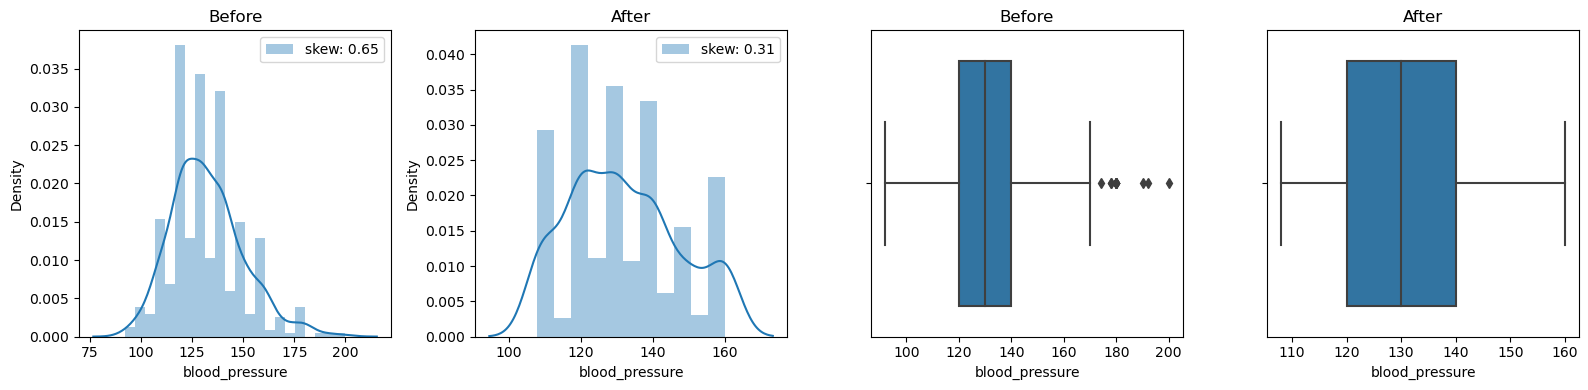

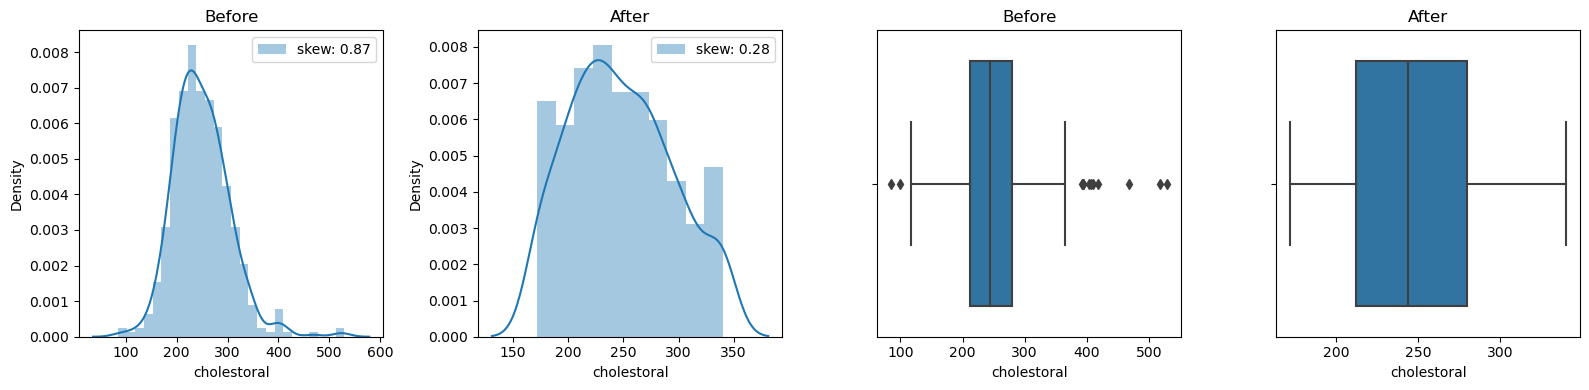

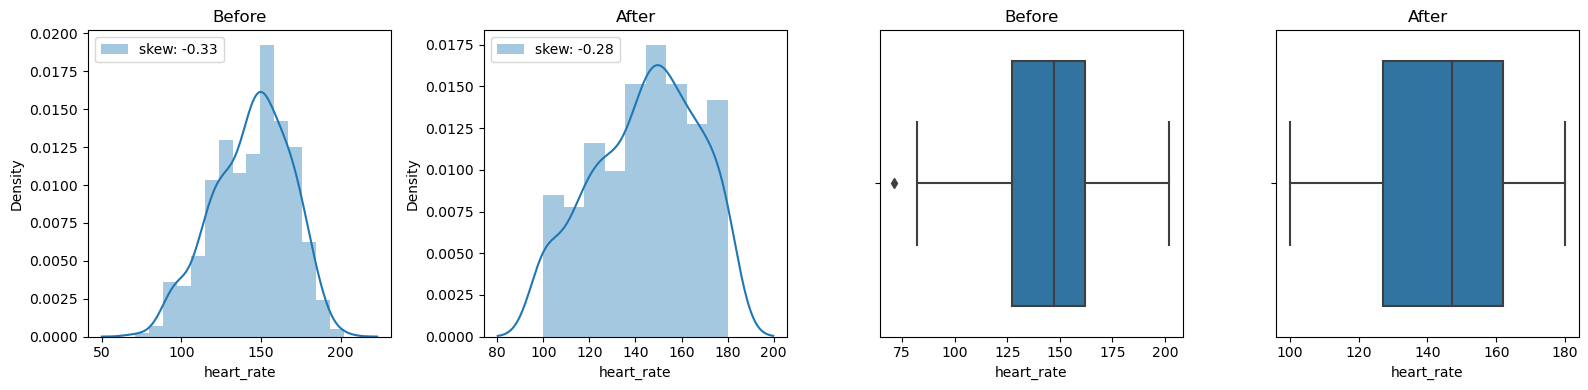

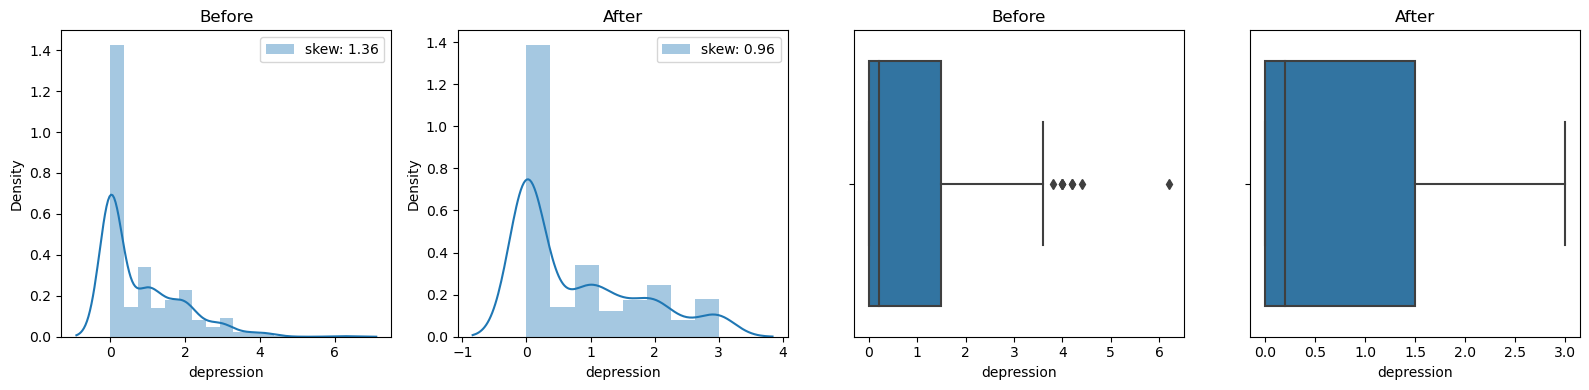

In [31]:
# ------------------- Train -----------------------
for col in outlier_new_win:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_train_0_05[col], label="skew: " + str(np.round(df_train_0_05[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_train[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_train_0_05[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

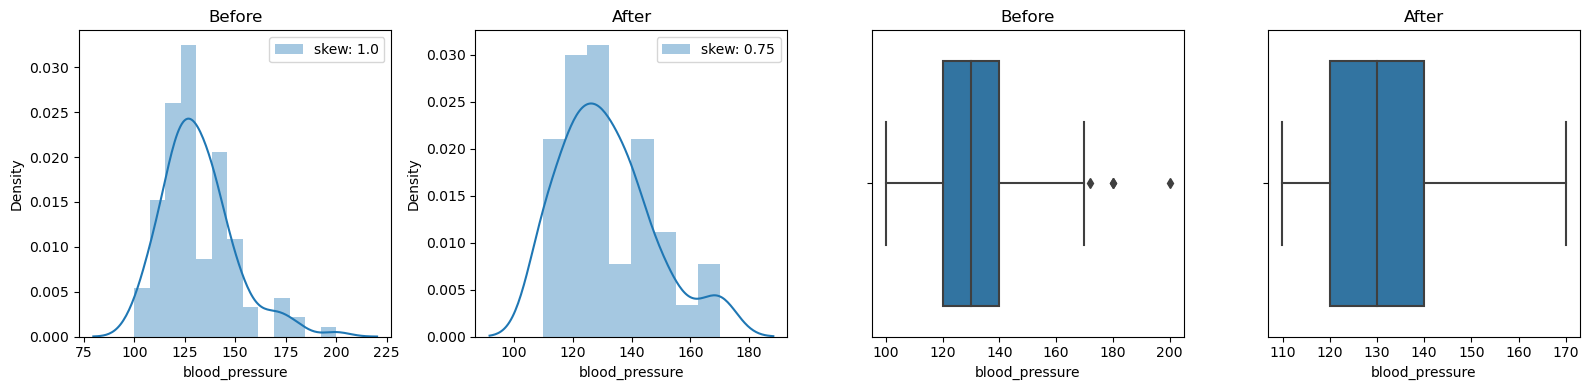

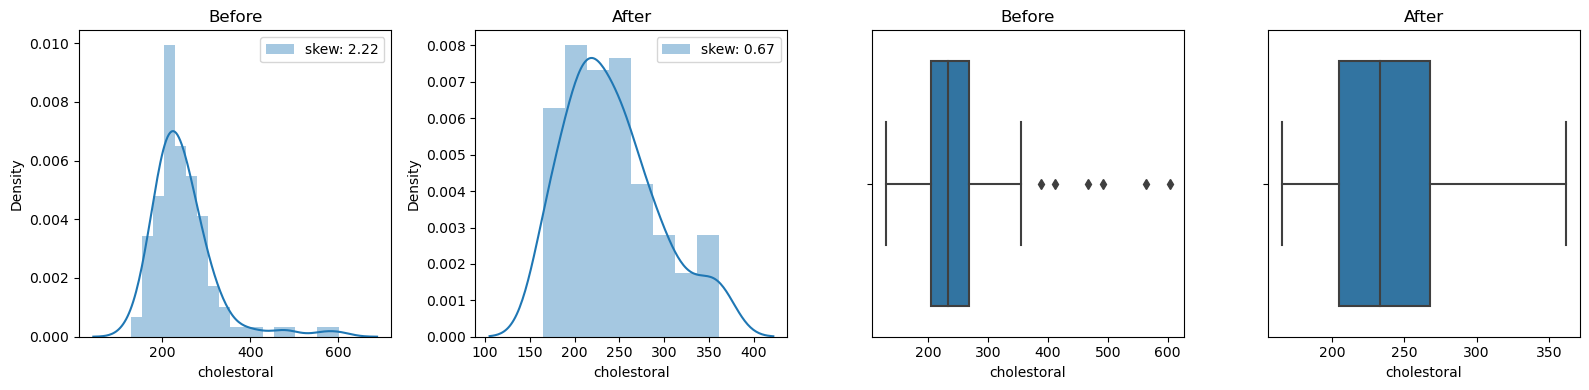

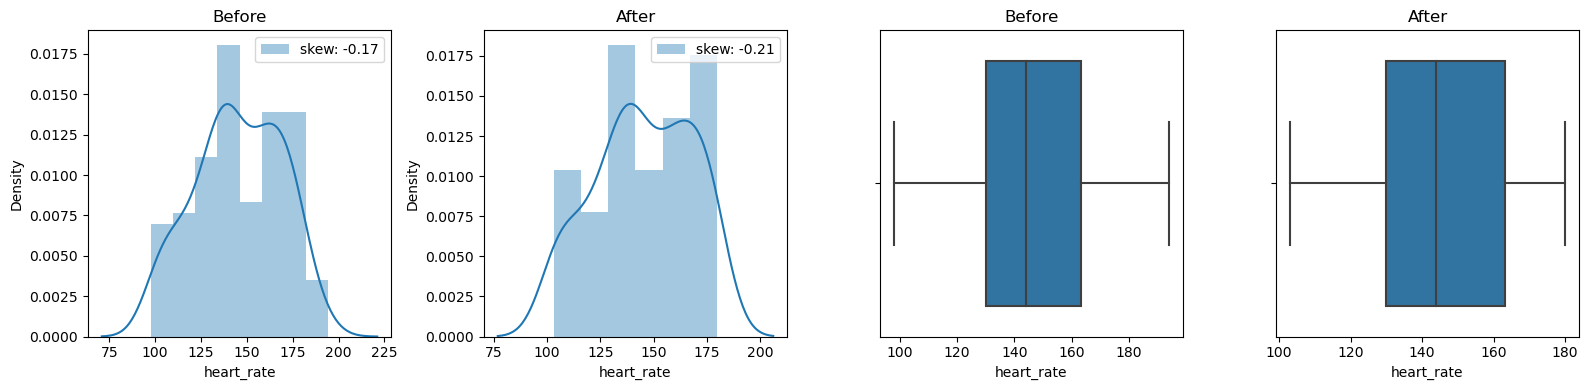

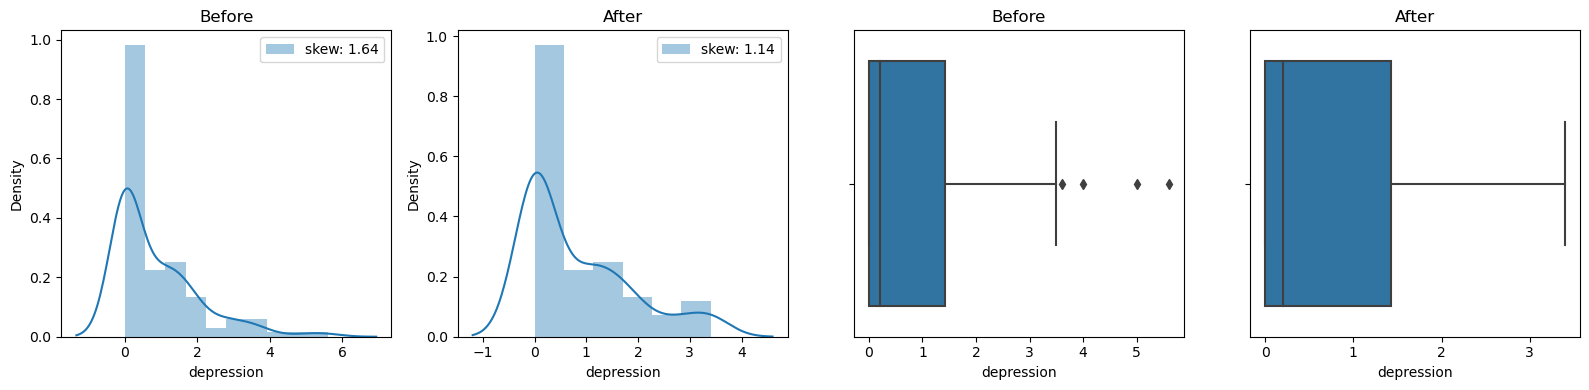

In [32]:
# ------------------- Val -----------------------
for col in outlier_new_win:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df_val[col], label="skew: " + str(np.round(df_val[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_val_0_05[col], label="skew: " + str(np.round(df_val_0_05[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_val[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_val_0_05[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

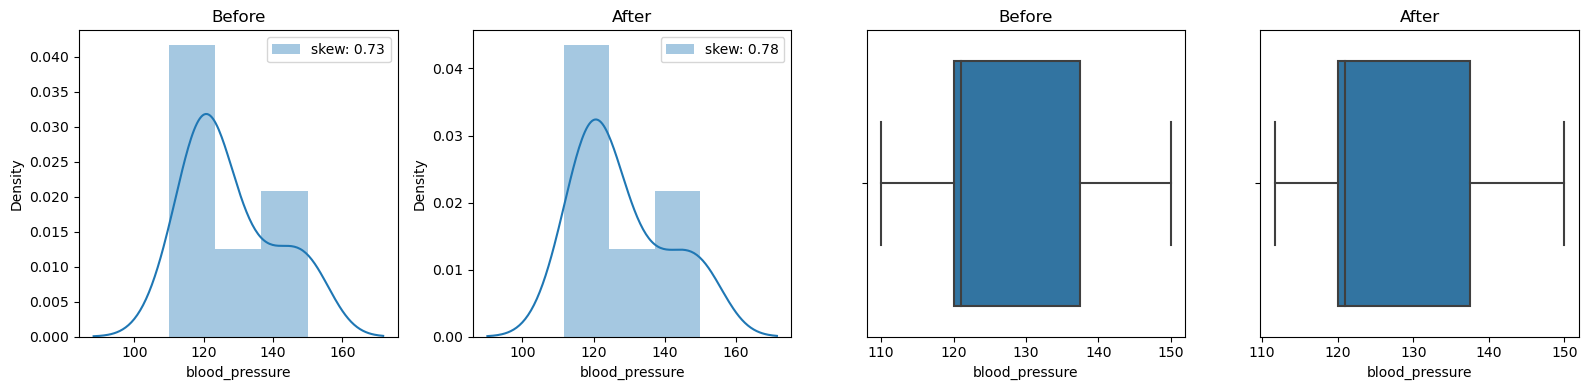

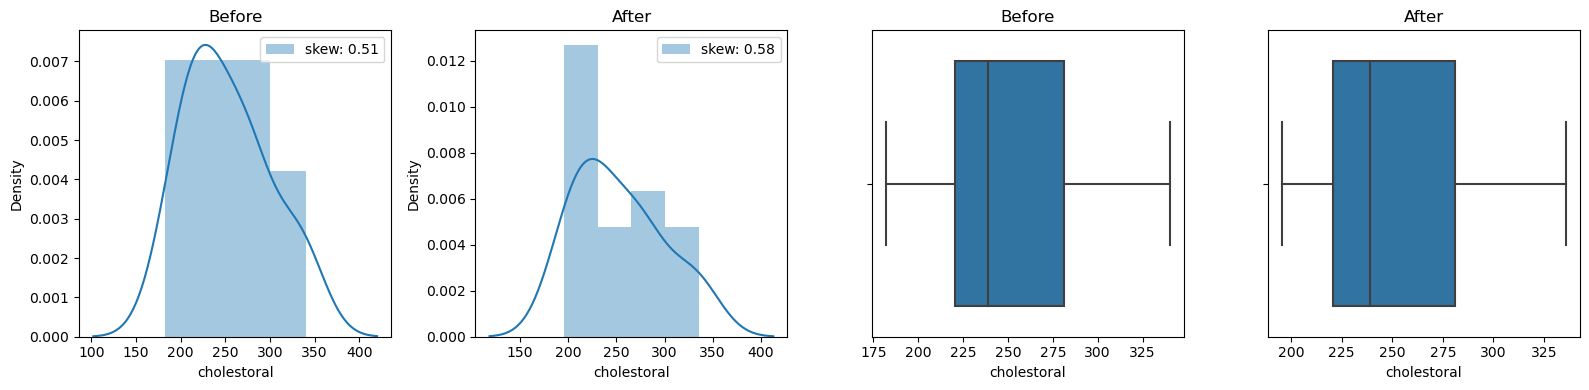

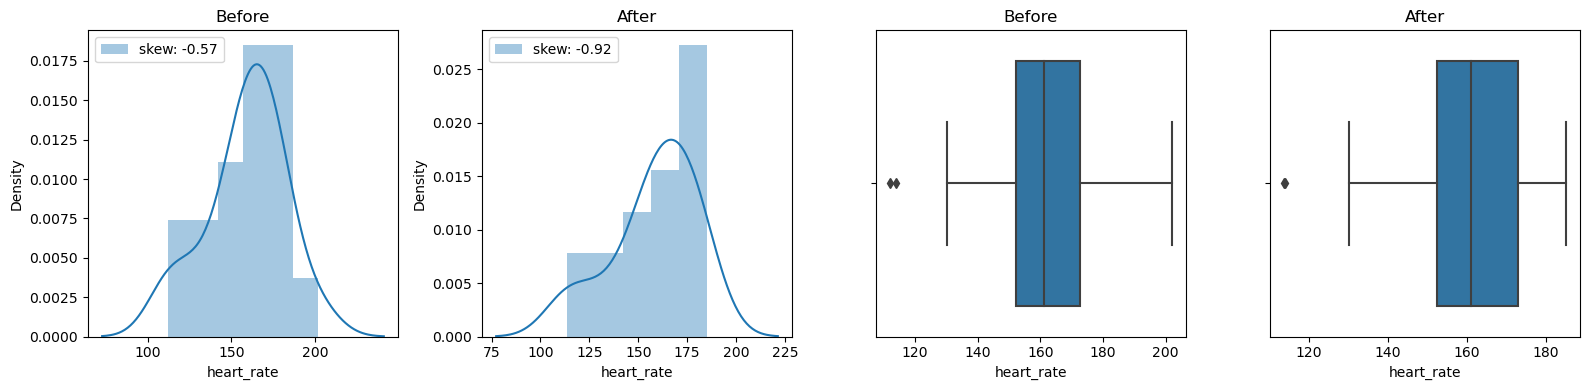

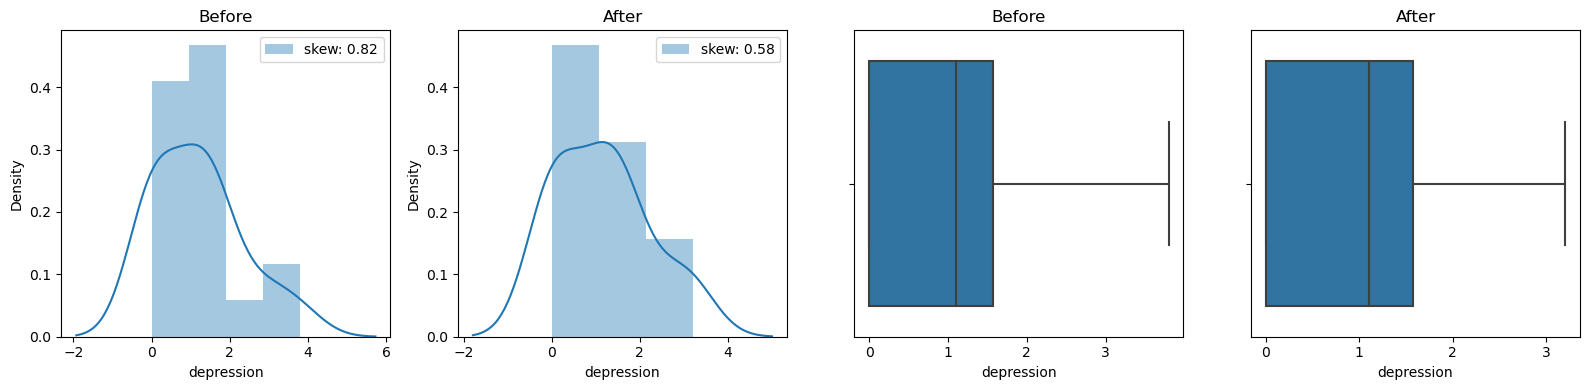

In [33]:
# ------------------- Test -----------------------
for col in outlier_new_win:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df_test[col], label="skew: " + str(np.round(df_test[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_test_0_05[col], label="skew: " + str(np.round(df_test_0_05[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_test[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_test_0_05[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [34]:
df_train[outlier_new_win].describe().T

,count,mean,std,min,25%,50%,75%,max
blood_pressure,476.0,132.296218,17.609282,92.0,120.0,130.0,140.0,200.0
cholestoral,457.0,249.083151,55.600960,85.0,212.0,244.0,280.0,529.0
heart_rate,476.0,144.256303,23.885725,71.0,127.0,147.0,162.0,202.0
depression,477.0,0.806080,1.044144,0.0,0.0,0.2,1.5,6.2


In [35]:
df_train_0_05[outlier_new_win].describe().T

,count,mean,std,min,25%,50%,75%,max
blood_pressure,476.0,131.840336,15.288101,108.0,120.0,130.0,140.0,160.0
cholestoral,457.0,247.844639,46.625736,171.8,212.0,244.0,280.0,340.2
heart_rate,476.0,144.336134,22.601827,100.0,127.0,147.0,162.0,180.0
depression,477.0,0.777778,0.960659,0.0,0.0,0.2,1.5,3.0


## Handle Missing Value 

In [36]:
print("Train:")
print(df_train_0_01.isnull().sum())

print("\n*********************\n")
print("Val:")
print(df_val_0_01.isnull().sum())

print("\n*********************\n")
print("Test:")
print(df_test_0_01.isnull().sum())
# -> df_test doesn't have any missing value

Train:
Age                       0
sex                       0
chest_pain                0
blood_pressure            1
cholestoral              20
blood_sugar               6
electrocardiographic      1
heart_rate                1
exercise_induced          1
depression                0
slope                   149
ca                      237
thal                    214
c                         0
dtype: int64

*********************

Val:
Age                      0
sex                      0
chest_pain               0
blood_pressure           0
cholestoral              3
blood_sugar              2
electrocardiographic     0
heart_rate               0
exercise_induced         0
depression               0
slope                   41
ca                      57
thal                    54
c                        0
dtype: int64

*********************

Test:
Age                     0
sex                     0
chest_pain              0
blood_pressure          0
cholestoral             0
blood_su

In [37]:
print("Train:")
print(df_train_0_01.isnull().mean()*100)

Train:
Age                      0.000000
sex                      0.000000
chest_pain               0.000000
blood_pressure           0.209644
cholestoral              4.192872
blood_sugar              1.257862
electrocardiographic     0.209644
heart_rate               0.209644
exercise_induced         0.209644
depression               0.000000
slope                   31.236897
ca                      49.685535
thal                    44.863732
c                        0.000000
dtype: float64


In [38]:
df_train_0_01[['blood_sugar', 'electrocardiographic', 'exercise_induced']].mode()

,blood_sugar,electrocardiographic,exercise_induced
0,0.0,0.0,0.0


In [39]:
df_train_0_01[['blood_pressure', 'cholestoral', 'heart_rate']] = df_train_0_01[['blood_pressure', 'cholestoral', 'heart_rate']].fillna(df_train_0_01[['blood_pressure', 'cholestoral', 'heart_rate']].median())
df_train_0_01 = df_train_0_01.dropna(thresh= 400 ,axis = 1)
df_train_0_01[['blood_sugar', 'electrocardiographic', 'exercise_induced']] = df_train_0_01[['blood_sugar', 'electrocardiographic', 'exercise_induced']].fillna(0.0)
df_train_0_01.isnull().sum()

Age                     0
sex                     0
chest_pain              0
blood_pressure          0
cholestoral             0
blood_sugar             0
electrocardiographic    0
heart_rate              0
exercise_induced        0
depression              0
c                       0
dtype: int64

In [40]:
print("Val:")
print(df_val_0_01.isnull().mean()*100)

Val:
Age                      0.000000
sex                      0.000000
chest_pain               0.000000
blood_pressure           0.000000
cholestoral              2.500000
blood_sugar              1.666667
electrocardiographic     0.000000
heart_rate               0.000000
exercise_induced         0.000000
depression               0.000000
slope                   34.166667
ca                      47.500000
thal                    45.000000
c                        0.000000
dtype: float64


In [41]:
df_val_0_01[['blood_sugar']].mode()

,blood_sugar
0,0.0


In [42]:
df_val_0_01[['cholestoral']] = df_val_0_01[['cholestoral']].fillna(df_val_0_01[['cholestoral']].median())
df_val_0_01[['blood_sugar']] = df_val_0_01[['blood_sugar']].fillna(0.0)
df_val_0_01.drop(['slope', 'ca', 'thal'], axis=1, inplace=True)
df_val_0_01.isnull().sum()

Age                     0
sex                     0
chest_pain              0
blood_pressure          0
cholestoral             0
blood_sugar             0
electrocardiographic    0
heart_rate              0
exercise_induced        0
depression              0
c                       0
dtype: int64

In [43]:
print("Train:")
print(df_train_0_01.columns)
print(df_train_0_01.shape)

print("\n*********************\n")
print("Val:")
print(df_val_0_01.columns)
print(df_val_0_01.shape)

print("\n*********************\n")
print("Test:")
print(df_test_0_01.columns)
print(df_test_0_01.shape)

Train:
Index(['Age', 'sex', 'chest_pain', 'blood_pressure', 'cholestoral',
       'blood_sugar', 'electrocardiographic', 'heart_rate', 'exercise_induced',
       'depression', 'c'],
      dtype='object')
(477, 11)

*********************

Val:
Index(['Age', 'sex', 'chest_pain', 'blood_pressure', 'cholestoral',
       'blood_sugar', 'electrocardiographic', 'heart_rate', 'exercise_induced',
       'depression', 'c'],
      dtype='object')
(120, 11)

*********************

Test:
Index(['Age', 'sex', 'chest_pain', 'blood_pressure', 'cholestoral',
       'blood_sugar', 'electrocardiographic', 'heart_rate', 'exercise_induced',
       'depression', 'slope', 'ca', 'thal'],
      dtype='object')
(18, 13)


In [44]:
df_test_0_01.drop(['slope', 'ca', 'thal'], axis=1, inplace=True)
df_test_0_01.head()

,Age,sex,chest_pain,blood_pressure,cholestoral,blood_sugar,electrocardiographic,heart_rate,exercise_induced,depression
0,43,0,2,122.0,263.00,0,0,173.0,0,0.0
1,59,1,1,140.0,283.00,1,1,162.0,1,1.0
2,58,0,3,120.0,339.15,1,0,172.0,0,0.0
3,69,0,1,150.0,226.00,0,0,114.0,1,2.6
4,42,0,4,150.0,247.00,0,1,171.0,0,1.5


## Handle Duplicate Value

In [45]:
print("Train:")
print(df_train_0_01.loc[df_train_0_01.duplicated()].shape)

print("\n*********************\n")
print("Val:")
print(df_val_0_01.loc[df_val_0_01.duplicated()].shape)
# -> df_val doesn't have any duplicate value

print("\n*********************\n")
print("Test:")
print(df_test_0_01.loc[df_test_0_01.duplicated()].shape)
# -> df_test doesn't have any duplicate value

Train:
(1, 11)

*********************

Val:
(0, 11)

*********************

Test:
(0, 10)


In [46]:
df_dup_0_01 = df_train_0_01.drop_duplicates()
print(df_train_0_01.shape, df_dup_0_01.shape)

(477, 11) (476, 11)


# Train/test split and normalization

In [47]:
x_train_0_01 = df_dup_0_01.drop('c', axis=1)
y_train_0_01 = df_dup_0_01['c']

# -----------------------------
x_val_0_01 = df_val_0_01.drop('c', axis=1)
y_val_0_01 = df_val_0_01['c']

In [48]:
x_test_0_01 = df_test_0_01.copy()
x_test_0_01.head()

,Age,sex,chest_pain,blood_pressure,cholestoral,blood_sugar,electrocardiographic,heart_rate,exercise_induced,depression
0,43,0,2,122.0,263.00,0,0,173.0,0,0.0
1,59,1,1,140.0,283.00,1,1,162.0,1,1.0
2,58,0,3,120.0,339.15,1,0,172.0,0,0.0
3,69,0,1,150.0,226.00,0,0,114.0,1,2.6
4,42,0,4,150.0,247.00,0,1,171.0,0,1.5


<div style="direction:rtl;line-height:300%;">
	<font face="B Titr" size=1 color=black>
نکته: حواستون در ادامه ی کار به نشت دادگان باشد که دستور فیت رو بروی سبدی غیر از آموزش نزنید. پایتان هیچ خطایی بشما برنمیگردونه.

In [49]:
scale_0_01 = MinMaxScaler()
col = x_train_0_01.columns
x_train_0_01[col] = scale_0_01.fit_transform(x_train_0_01[col])

x_val_0_01[col] = scale_0_01.transform(x_val_0_01[col])
x_test_0_01[col] = scale_0_01.transform(x_test_0_01[col])

In [50]:
x_train_0_01.head()

,Age,sex,chest_pain,blood_pressure,cholestoral,blood_sugar,electrocardiographic,heart_rate,exercise_induced,depression
239,0.125000,0.0,0.0,0.250,0.086258,0.0,0.5,0.964467,0.0,0.00
490,0.520833,1.0,1.0,0.500,0.395901,0.0,0.0,0.284264,1.0,0.00
590,0.416667,1.0,1.0,0.350,0.277942,0.0,0.0,0.060914,1.0,0.00
181,0.500000,1.0,1.0,0.300,0.454881,0.0,0.5,0.223350,1.0,0.75
570,0.750000,0.0,1.0,0.625,0.325863,0.0,1.0,0.243655,0.0,0.25


In [51]:
x_val_0_01.head()

,Age,sex,chest_pain,blood_pressure,cholestoral,blood_sugar,electrocardiographic,heart_rate,exercise_induced,depression
405,0.333333,1.0,0.000000,0.1250,0.469625,0.0,0.0,0.426396,0.0,0.3
132,0.270833,1.0,0.333333,0.2500,0.583899,0.0,0.0,0.730964,0.0,0.0
211,0.312500,1.0,0.333333,0.3750,0.289000,0.0,0.0,0.456853,0.0,0.0
243,0.520833,1.0,0.333333,0.2500,0.403273,0.0,0.0,0.203046,0.0,0.0
85,0.791667,0.0,0.666667,0.1875,1.532439,0.0,1.0,0.710660,0.0,0.4


In [52]:
x_test_0_01.head()

,Age,sex,chest_pain,blood_pressure,cholestoral,blood_sugar,electrocardiographic,heart_rate,exercise_induced,depression
0,0.291667,0.0,0.333333,0.275,0.465939,0.0,0.0,0.842640,0.0,0.000
1,0.625000,1.0,0.000000,0.500,0.539664,1.0,0.5,0.730964,1.0,0.250
2,0.604167,0.0,0.666667,0.250,0.746646,1.0,0.0,0.832487,0.0,0.000
3,0.833333,0.0,0.000000,0.625,0.329549,0.0,0.0,0.243655,1.0,0.650
4,0.270833,0.0,1.000000,0.625,0.406960,0.0,0.5,0.822335,0.0,0.375


# Hyperparameter Tunning

In [53]:
param_DT = {'criterion':['gini', 'entropy'] ,
            'max_depth':[None,2,3,4,5,6] ,
            'min_samples_split':[2,3,4,5,6] ,
            'min_samples_leaf':[2,3,4,5,6]}


GrdSrch_Tune(DecisionTreeClassifier(random_state = 100), x_train_0_01, y_train_0_01, param_DT)

best score is : 0.7816885964912281
best estimator is : DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       random_state=100)
best Params is : {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2}


0.7816885964912281

<div style="direction:rtl;line-height:300%;">
	<font face="B Titr" size=1 color=black>
نکته: برای بهبود نتیجه ارزیابی متقاطع می‌توان از جست‌وجوهایی بجز جست‌وجوی شبکه‌ای استفاده کرد. نظیر: بیزین

# Modeling

In [54]:
DT_0_01 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5, random_state=100)
DT_0_01.fit(x_train_0_01, y_train_0_01)

y_val_pred_DT_0_01 = DT_0_01.predict(x_val_0_01)
y_train_pred_DT_0_01 = DT_0_01.predict(x_train_0_01)

val_acc_DT_0_01 = accuracy_score(y_val_0_01, y_val_pred_DT_0_01)
train_acc_DT_0_01 = accuracy_score(y_train_0_01, y_train_pred_DT_0_01)
scores_DT_0_01 = cross_val_score(DT_0_01, x_train_0_01, y_train_0_01, cv = 10, scoring = 'accuracy')

precision_score_DT_0_01 = precision_score(y_val_0_01, y_val_pred_DT_0_01)
recall_score_DT_0_01 = recall_score(y_val_0_01, y_val_pred_DT_0_01)
f1_score_DT_0_01 = f1_score(y_val_0_01, y_val_pred_DT_0_01)
conf_DT_0_01 = confusion_matrix(y_val_0_01, y_val_pred_DT_0_01)

print("Train set Accuracy: ", train_acc_DT_0_01)
print("Val set Accuracy: ", val_acc_DT_0_01)
print("cv:  %s\n"% scores_DT_0_01.mean())
print("************************************************")
print("precision_score: ", precision_score_DT_0_01)
print("recall_score: ", recall_score_DT_0_01)
print("f1_score: ", f1_score_DT_0_01)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_val_0_01, y_val_pred_DT_0_01))

Train set Accuracy:  0.8214285714285714
Val set Accuracy:  0.8083333333333333
cv:  0.7670212765957446

************************************************
precision_score:  0.8461538461538461
recall_score:  0.66
f1_score:  0.7415730337078651
************************************************

Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        70
           1       0.85      0.66      0.74        50

    accuracy                           0.81       120
   macro avg       0.82      0.79      0.79       120
weighted avg       0.81      0.81      0.80       120




In [5]:
joblib.dump(DT_0_01,r"C:\Users\Codes-project\06-Heart\model\DT_0_01.pkl")

NameError: name 'DT_0_01' is not defined

# Prediction

In [56]:
# DT_0_01 = joblib.load(r"C:\Users\Codes-project\06-Heart\model\DT_0_01.pkl")
# DT_0_01

<div style="direction:rtl;line-height:300%;">
	<font face="B Titr" size=1 color=black>
اینجا دادگان نهایی آزمایش (نه ولیدیشن) رو به مدل درخت دادیم و نتایج بدون بیش برازش رو داریم مشاهده میکنیم. جاب لیب رو جلسه قبل تو کلاس بررسی کردیم

In [57]:
predictions = DT_0_01.predict(x_test_0_01)
predictions

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [58]:
x_test_with_pred = x_test_0_01.copy()

In [59]:
x_test_with_pred[col] = scale_0_01.inverse_transform(x_test_with_pred[col])

In [60]:
x_test_with_pred['Prediction'] = predictions
x_test_with_pred

,Age,sex,chest_pain,blood_pressure,cholestoral,blood_sugar,electrocardiographic,heart_rate,exercise_induced,depression,Prediction
0,43.0,0.0,2.0,122.00,263.00,0.0,0.0,173.00,0.0,0.000,0
1,59.0,1.0,1.0,140.00,283.00,1.0,1.0,162.00,1.0,1.000,0
2,58.0,0.0,3.0,120.00,339.15,1.0,0.0,172.00,0.0,0.000,0
3,69.0,0.0,1.0,150.00,226.00,0.0,0.0,114.00,1.0,2.600,1
4,42.0,0.0,4.0,150.00,247.00,0.0,1.0,171.00,0.0,1.500,0
5,52.0,1.0,4.0,140.00,203.00,1.0,2.0,155.00,0.0,3.100,1
6,46.0,1.0,2.0,120.00,229.00,0.0,0.0,168.00,1.0,1.000,0
7,58.0,0.0,2.0,110.34,284.00,1.0,0.0,160.00,0.0,1.800,0
8,63.0,1.0,3.0,130.00,335.00,0.0,2.0,158.00,1.0,0.000,0
9,55.0,0.0,4.0,150.00,276.00,1.0,1.0,112.34,0.0,0.600,0


<div style="direction:rtl;line-height:300%;">
	<font face="B Titr" size=1 color=black>
همیشه بدرخشی